In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The pre-class assignment quiz must be submitted on D2L on or before **_11:59pm on on the day before class_**.  Students must come to class the next day prepared to discuss the material covered in this assignment.

# 13 Pre-Class Assignment: Projections

### Readings for this topic (Recommended in bold)
 * [Heffron Section VI pg 267-275](http://joshua.smcvt.edu/linearalgebra/book.pdf)
 * [Beezer Subsections OV-GSP pg 154-161](http://linear.ups.edu/download/fcla-3.50-tablet.pdf)
 * [**_Boyd Section 5.3-5.4 pg 95-102_**](http://vmls-book.stanford.edu/vmls.pdf)


### Goals for today's pre-class assignment 

1. [Orthogonal and Orthonormal](#Orthogonal_and_Orthonormal)
1. [Orthogonal Projections](#Projections)
1. [Code Review](#Code_Review)
1. [Gram-Schmidt](#Gram-Schmidt)

----
<a name="Orthogonal_and_Orthonormal"></a>
## 1. Orthogonal and Orthonormal

**Definition:** A set of vectors is said to be **orthogonal** if every pair of vectors in the set is orthogonal (the dot product is 0). 
The set is **orthonormal** if it is orthogonal and each vector is a unit vector (norm equals 1). 

**Result:** An orthogonal set of nonzero vectors is linearly independent.

**Definition:** A basis that is an orthogonal set is called an orthogonal basis.
A basis that is an orthonormal set is called an orthonormal basis.

**Result:** Let $\{u_1,\dots,u_n\}$ be an orthonormal basis for a vector space $V$. 
Then for any vector $v$ in $V$, we have 
$$v=(v\cdot u_1)u_1+(v\cdot u_2)u_2 +\dots + (v\cdot u_n)u_n$$


&#9989; **<font color=red>DO THIS:</font>**  Let's think why the above result is true. Since $\{u_1,\dots,u_n\}$ is a basis, we can express $v$ as a linear combination of the form $$v=a_1u_1 + \dots a_nu_n.$$ Now, take the dot product of $v$ with $u_i$, what is the result? (Hint: Use the fact that the basis is orthonormal and show $v\cdot u_i =a_i$). Explain why and explain why the above formula is correct.


**Definition:** A *square* matrix is **orthogonal** if $A^{-1}=A^\top$.

**Result:** Let $A$ be a square matrix. The following three statements are equivalent.

(a) $A$ is orthogonal. 

(b) The column vectors of $A$ form an orthonormal set. 

(c) The row vectors of $A$ form an orthonormal set.

(d) $A^{-1}$ is orthogonal. 

(e) $A^\top$ is orthogonal.

**Result:** If $A$ is an orthogonal matrix, then we have $|A|=\pm 1$.

Consider the following vectors $u_1, u_2$, and $u_3$ that form a basis for $\mathbb R^3$. 

$$ u_1 = (1,0,0)$$
$$ u_2 = (0, \frac{1}{\sqrt(2)}, \frac{1}{\sqrt(2)})$$
$$ u_3 = (0, \frac{1}{\sqrt(2)}, -\frac{1}{\sqrt(2)})$$

&#9989; **<font color=red>DO THIS:</font>**  Show that the vectors $u_1$, $u_2$, and $u_3$ are linearly independent (**HINT:** see the pre-class  12-Change_Basis):

Becuase the determinant is not equal to 0.

In [1]:
import numpy as np
import sympy as sym
A = np.matrix([[(1/(2**(1/2))),(1/(2**(1/2))),0],[(1/(2**(1/2))),(-1/(2**(1/2))),0], [0,0,1]]).T
sym.Matrix(A)

Matrix([
[0.707106781186547,  0.707106781186547, 0.0],
[0.707106781186547, -0.707106781186547, 0.0],
[              0.0,                0.0, 1.0]])

In [2]:
print(np.linalg.det(A))

-0.9999999999999998


&#9989; **<font color=red>QUESTION 1:</font>** How do you show that $u_1$, $u_2$, and $u_3$ are orthogonal?

The dot product of $u_1, u_2,$ and $u_3$ is 0. Therefore, the vectors are orthogonal.

&#9989; **<font color=red>QUESTION 2:</font>** How do you show that $u_1$, $u_2$, and $u_3$ are normal vectors?

By taking their dot product.

&#9989; **<font color=red>DO THIS:</font>**  Express the vector $v = (7,5,-1)$ as a linear combination of the $u_1$, $u_2$, and $u_3$ basis vectors:

In [3]:
# Put your answer here
b = np.matrix([[2,3,1]]).T
x = np.linalg.solve(A,b)
print(x)

[[ 3.53553391]
 [-0.70710678]
 [ 1.        ]]


<a name="Projections"></a>
## 2. Orthogonal Projections



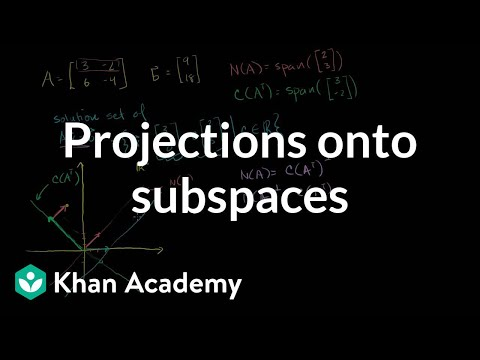

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("5B8XluiqdHM",width=640,height=360, cc_load_policy=True)


The **(orthogonal) projection** of the vector $v$ onto the vector $u$ is given by
$$\mbox{proj}_u v = \frac{v \cdot u}{u \cdot u} u.$$

&#9989; **<font color=red>QUESTION 3:</font>** How does the above formula simplify if the vector $u$ is normal (has length 1)?

$$ \mbox{proj}_{u}v = vu$$

&#9989; **<font color=red>QUESTION 4:</font>** Calculate the projection of the vector $v=(2,5)$ onto $u=(3,4)$.

In [22]:
v = np.array([2,5])
u = np.array([3,4])
vu = np.dot(v,u)
uu = np.dot(u,u)
div = vu/uu
proj = div*u
print(proj)

[3.12 4.16]


### Projection of a Vector onto a Subspace

Think of a projection onto a subspace is analogous to a shadow on a surface.  Aspects of an objects 3D space is represented in a 2D shadow but you can't take the shadow by itself and exactly recreate the 3D surface. 

<img alt="Picture of a hand shadow puppet of a bird.  Used to represent a projection" src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Hand_shadow_bird.jpg" width=30%>

Image from https://commons.wikimedia.org

The following is the matimatical defination of projection onto a subspace.

**Definition**: Let $W$ be a subspace of $R^n$ of dimension $m$. Let $\{w_1,\cdots,w_m\}$ be an orthonormal basis for $W$. Then the projection of vector $v$ in $R^n$ onto $W$ is denoted as $\mbox{proj}_Wv$ and is defined as 
$$\mbox{proj}_Wv = (v\cdot w_1)w_1+(v\cdot w_2)w_2+\cdots+(v\cdot w_m)w_m$$


Another way to say the above defination is that the project of $v$ onto the $W$ is just the sumation of $v$ projected onto each vector in a basis of $W$


**Remarks**: 
> In the Gram-Schmidt algorithm below, we will use projection for $m>1$. 

> The projection does not depend on which orthonormal basis you choose. 

> If $v$ is in $W$, we have $\mbox{proj}_Wv=v$.

&#9989; **<font color=red>QUESTION 5:</font>** If the vector $v$ is orthogonal to the subspace $S$, what is $\mbox{proj}_S v$? If $v$ is a vector in $S$, what is $\mbox{proj}_S v$?

Put your answer here

&#9989; **<font color=red>QUESTION 6:</font>**  If $v$ is a vector in $S$, what is $\mbox{proj}_S v$?

Put your answer here

----
<a name="Code_Review"></a>
## 3. Code Review

In the next in-class assignment, we are going to avoid some of the more advanced libraries ((i.e. no ```numpy``` or ```scipy``` or ```sympy```) to try to get a better understanding of what is going on in the math. 
The following code implements some common linear algebra functions:

In [10]:
#Standard Python Libraries only
import math
import copy

In [11]:
def dot(u,v):
    '''Calculate the dot product between vectors u and v'''
    if len(u) != len(v):
        print("ERROR -  dimensions not equal")
    else:
        temp = 0;
        for i in range(len(u)):
            temp += u[i]*v[i]
        return temp

&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the output of the above ```dot``` function with the ```numpy``` dot function.

In [12]:
# Put your test code here
import numpy as np
import sympy as sym
u = np.array([3,4])
v = np.array([3,4])
print(dot(u,v))
print(np.dot(u,v))
if dot(u,v) == np.dot(u,v):
    print("The function and the numpy result is equal.")
else:
    print("The function and the numpy result are not equal.")

25
25
The function and the numpy result is equal.


In [13]:
def multiply(m1,m2):
    '''Calculate the matrix multiplication between m1 and m2 represented as list-of-list.'''
    n = len(m1)
    d = len(m2)
    m = len(m2[0])
    
    if len(m1[0]) != d:
        print("ERROR - inner dimensions not equal")
    else:
        #make zero matrix
        result = [[0 for j in range(m)] for i in range(n)]
        #print(result)
        for i in range(0,n):
            for j in range(0,m):
                for k in range(0,d):
                    #print(i,j,k)
                    #print('result', result[i][j])
                    #print('m1', m1[i][k])
                    #print('m2', m2[k][j])
                    result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
        return result


&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the output of the above ```multiply``` function with the ```numpy``` multiply function.

In [14]:
# Put your test code here
import numpy as np
import sympy as sym
m1 = np.array([[1,2],[3,4]])
m2 = np.array([[5,6],[7,8]])
print(multiply(m1,m2))
m11 = np.matrix([[1,2],[3,4]])
m22 = np.matrix([[5,6],[7,8]])
print(m11*m22)

[[19, 22], [43, 50]]
[[19 22]
 [43 50]]


Here is a mathematical definition of the big-O notation: https://en.wikipedia.org/wiki/Big_O_notation

and here is a computer science perspective of the big-O notation:

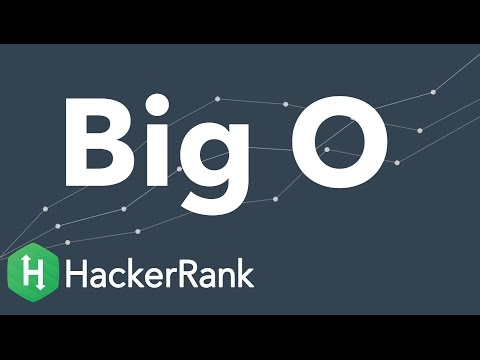

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("v4cd1O4zkGw",width=640,height=360, cc_load_policy=True)

&#9989; **<font color=red>QUESTION:</font>** What is the big-O complexity of the above ```multiply``` function?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>** Line 11 in the provided ```multiply``` code initializes a matrix of the size of the output matrix as a list of lists with zeros. What is the big-O complexity of line 11?

Put your answer to the above question here.

In [34]:
def norm(u):
    '''Calculate the norm of vector u'''
    nm = 0
    for i in range(len(u)):
        nm += u[i]*u[i]
    return math.sqrt(nm)

&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the outputs of the above ```norm``` function with the ```numpy``` norm function.

In [37]:
#Put your test code here
u = [2,3]
print(norm(u))
v = np.array(u)
print(np.linalg.norm(v))

3.605551275463989
3.605551275463989


In [38]:
def transpose(A):
    '''Calculate the transpose of matrix A represented as list of lists'''
    n = len(A)
    m = len(A[0])
    AT = list()
    for j in range(0,m):    
        temp = list()
        for i in range(0,n):
            temp.append(A[i][j])
        AT.append(temp)
    return AT

&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the output of the above ```transpose``` function with the ```numpy``` transpose function.

In [42]:
# Put your test code here
A = [[1,2],[2,3]]
print(transpose(A))
Anp = np.array(A).T
print(Anp)

[[1, 2], [2, 3]]
[[1 2]
 [2 3]]


&#9989; **<font color=red>QUESTION:</font>** What is the big-O complexity of the above ```transpose``` function?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Explain any differences in results between the provided functions and their ```numpy``` counterparts. 

Put your answer to the above question here

----
<a name="Gram-Schmidt"></a>
## 4. Gram-Schmidt


Watch this video for the introduction of Gram-Schmidt, which we will implement in class.

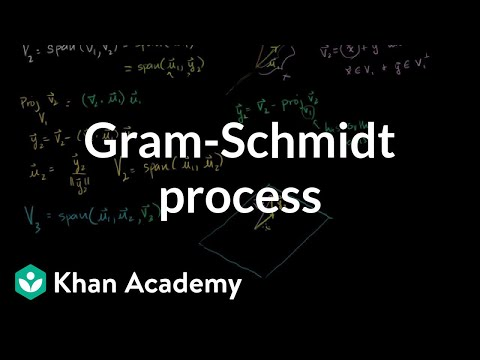

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("rHonltF77zI",width=640,height=360, cc_load_policy=True)

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.


### Congratulations, we're done!